# MNIST Benchmark

Summary of results for:

1. MNIST
2. Kuzushiji-MNIST
3. Fashion-MNIST

Notes on evaluation:

* Each dataset consists of multiple experiments.
* Each unique experiment can be identified by looking at the `train_kwargs` parameter.
    * Standard PyTorch sampling occurs when `{"sampler": False}`
    * Datasetq Heapq sampling occurs when `{"sampler": True}`
* Each unique experiment is conducted on 5 different seeds with per epoch data shuffling. 
    * The average of the five seeds are shown below. 

In [1]:
import sys

sys.path.append("../")
import summary

In [2]:
metrics = [
    "loss",
    "accuracy",
    "macro avg precision",
    "macro avg recall",
    "macro avg f1-score",
    "weighted avg precision",
    "weighted avg recall",
    "weighted avg f1-score",
    "time",
]

## 1. MNIST Experiment

In [3]:
!cat mnist.sh

#!/bin/bash

dataset="mnist"

epochs=14
base=1431655765
test_kwargs='{"batch_size":1000,"sampler":true,"steps":1,"shuffle":false}'

for (( i=0; i<5; i++ ))
do
    seed=$((base-i))

    #--- PyTorch DataLoader
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": false, "shuffle": true}' --epochs $epochs --seed $seed

    # --- Datasetq BaseLoader
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": true, "steps": 1, "shuffle": true}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed

    # --- Datasetq DataqLoader
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": true, "shuffle": true}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": true, "shuffle": true, "max_visits": 10}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed
    time python mnist.py --dataset $data

In [4]:
dataset = "results"
experiment_name = "mnist_results"
csv_file = "test_result.csv"

In [5]:
results = [
    summary.get_dataframes(
        dataset=dataset,
        results=experiment_name,
        csv_file=csv_file,
    )
]

In [6]:
params, results = zip(*results)

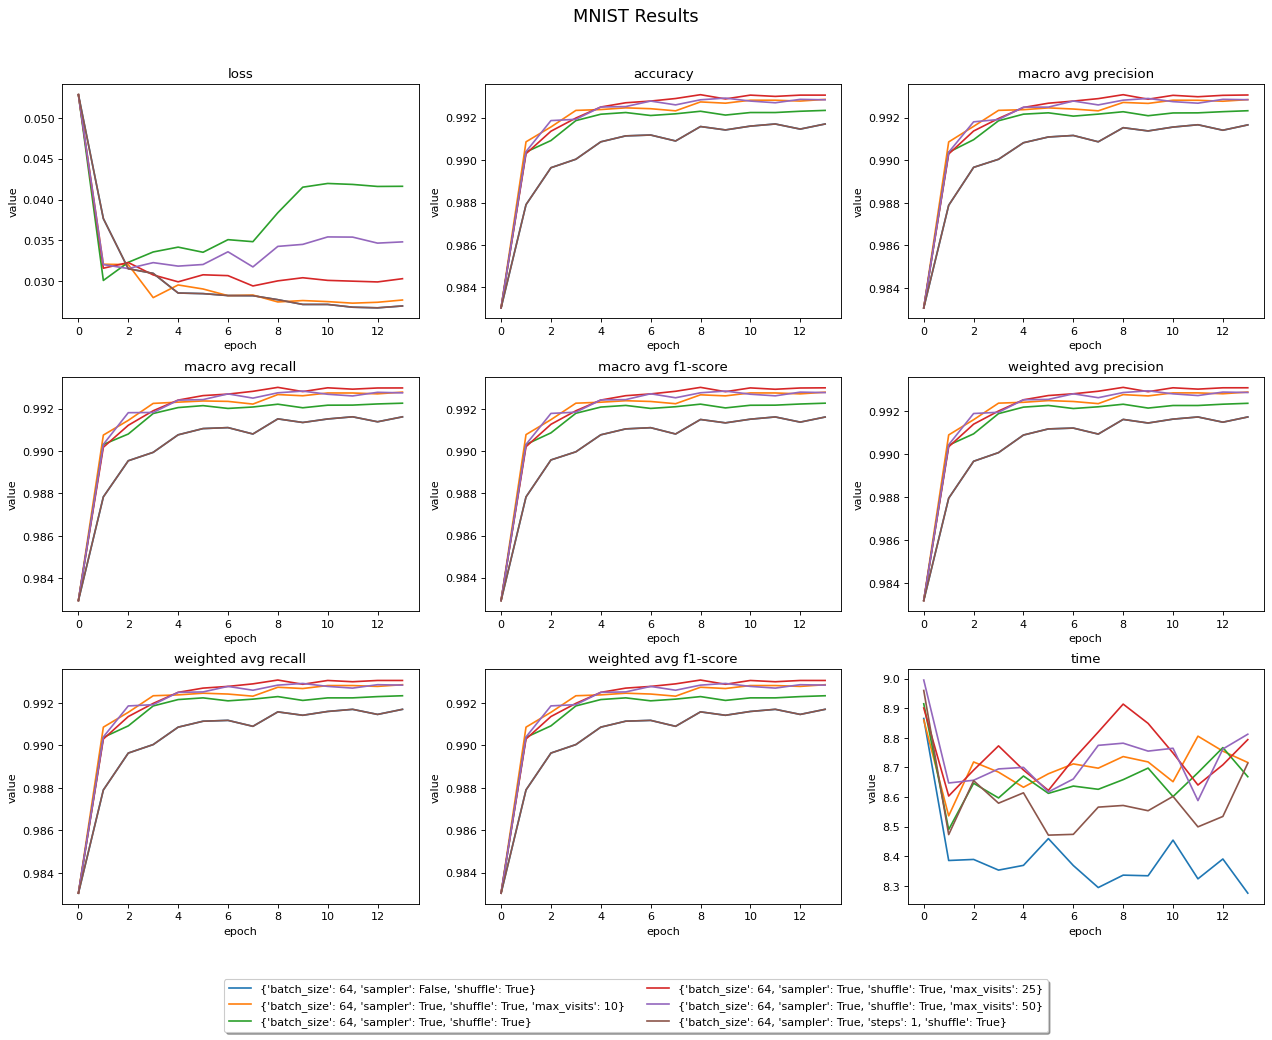

In [7]:
summary.plot_experiments_as_grid(params, results, metrics, title="MNIST Results")

In [8]:
summary.show_experiments_at_epoch(params, results, metrics, 13)

,loss,accuracy,macro avg precision,macro avg recall,macro avg f1-score,weighted avg precision,weighted avg recall,weighted avg f1-score,time,batch_size,sampler,shuffle,max_visits,steps
0,0.026950,0.99170,0.991661,0.991609,0.991627,0.991711,0.99170,0.991698,8.275861,64,False,True,NaN,NaN
1,0.027681,0.99286,0.992849,0.992776,0.992807,0.992867,0.99286,0.992858,8.716663,64,True,True,10.0,NaN
2,0.041621,0.99234,0.992326,0.992253,0.992285,0.992345,0.99234,0.992337,8.668688,64,True,True,NaN,NaN
3,0.030294,0.99306,0.993066,0.992972,0.993014,0.993065,0.99306,0.993057,8.793905,64,True,True,25.0,NaN
4,0.034807,0.99284,0.992844,0.992740,0.992788,0.992846,0.99284,0.992838,8.812092,64,True,True,50.0,NaN
5,0.026950,0.99170,0.991661,0.991609,0.991627,0.991711,0.99170,0.991698,8.714225,64,True,True,NaN,1.0


## 2. Kuzushiji-MNIST Experiment

In [9]:
!cat kmnist.sh

#!/bin/bash

dataset="kmnist"

epochs=14
base=1431655765
test_kwargs='{"batch_size":1000,"sampler":true,"steps":1,"shuffle":false}'

for (( i=0; i<5; i++ ))
do
    seed=$((base-i))

    #--- PyTorch DataLoader
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": false, "shuffle": true}' --epochs $epochs --seed $seed

    # --- Datasetq BaseLoader
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": true, "steps": 1, "shuffle": true}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed

    # --- Datasetq DataqLoader
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": true, "shuffle": true}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": true, "shuffle": true, "max_visits": 10}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed
    time python mnist.py --dataset $dat

In [10]:
dataset = "results"
experiment_name = "kmnist_results"
csv_file = "test_result.csv"

In [11]:
results = [
    summary.get_dataframes(
        dataset=dataset,
        results=experiment_name,
        csv_file=csv_file,
    )
]

In [12]:
params, results = zip(*results)

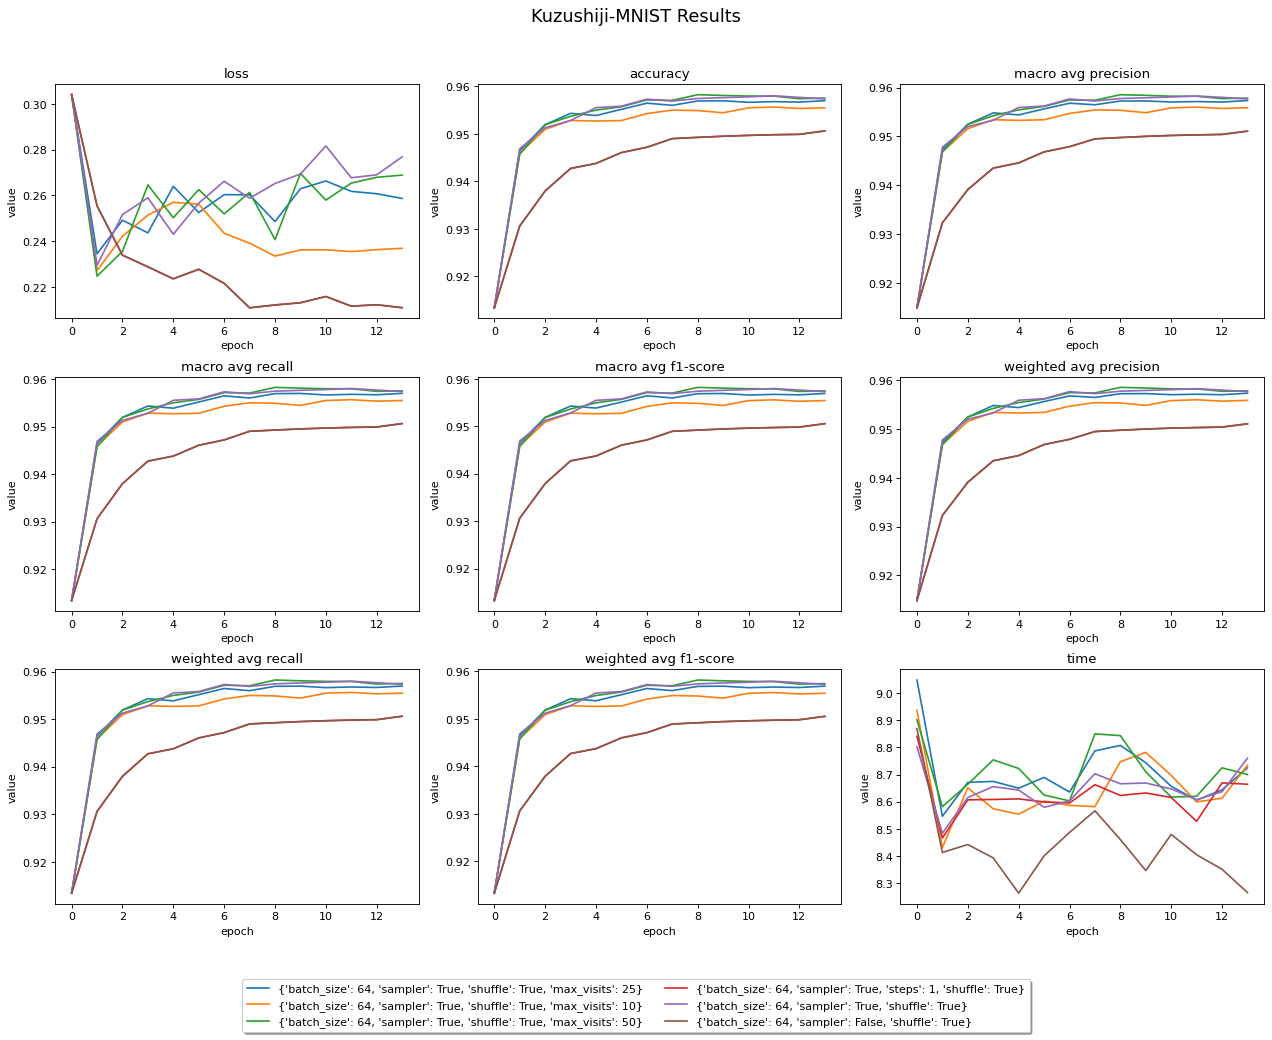

In [13]:
summary.plot_experiments_as_grid(params, results, metrics, title="Kuzushiji-MNIST Results")

In [14]:
summary.show_experiments_at_epoch(params, results, metrics, 13)

,loss,accuracy,macro avg precision,macro avg recall,macro avg f1-score,weighted avg precision,weighted avg recall,weighted avg f1-score,time,batch_size,sampler,shuffle,max_visits,steps
0,0.258682,0.95698,0.957371,0.95698,0.956912,0.957371,0.95698,0.956912,8.725255,64,True,True,25.0,NaN
1,0.236907,0.95548,0.955899,0.95548,0.955403,0.955899,0.95548,0.955403,8.734418,64,True,True,10.0,NaN
2,0.268874,0.95752,0.957867,0.95752,0.957443,0.957867,0.95752,0.957443,8.700175,64,True,True,50.0,NaN
3,0.210982,0.95062,0.951095,0.95062,0.950539,0.951095,0.95062,0.950539,8.664458,64,True,True,NaN,1.0
4,0.276857,0.95736,0.957706,0.95736,0.957294,0.957706,0.95736,0.957294,8.760177,64,True,True,NaN,NaN
5,0.210982,0.95062,0.951095,0.95062,0.950539,0.951095,0.95062,0.950539,8.265756,64,False,True,NaN,NaN


## 3. Fashion-MNIST Experiment

In [15]:
!cat fashion_mnist.sh

#!/bin/bash

dataset="fashion_mnist"

epochs=14
base=1431655765
test_kwargs='{"batch_size":1000,"sampler":true,"steps":1,"shuffle":false}'

for (( i=0; i<5; i++ ))
do
    seed=$((base-i))

    #--- PyTorch DataLoader
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": false, "shuffle": true}' --epochs $epochs --seed $seed

    # --- Datasetq BaseLoader
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": true, "steps": 1, "shuffle": true}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed

    # --- Datasetq DataqLoader
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": true, "shuffle": true}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed
    time python mnist.py --dataset $dataset --train-kwargs '{"batch_size": 64, "sampler": true, "shuffle": true, "max_visits": 10}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed
    time python mnist.py --datas

In [16]:
dataset = "results"
experiment_name = "fashion_mnist_results"
csv_file = "test_result.csv"

In [17]:
results = [
    summary.get_dataframes(
        dataset=dataset,
        results=experiment_name,
        csv_file=csv_file,
    )
]

In [18]:
params, results = zip(*results)

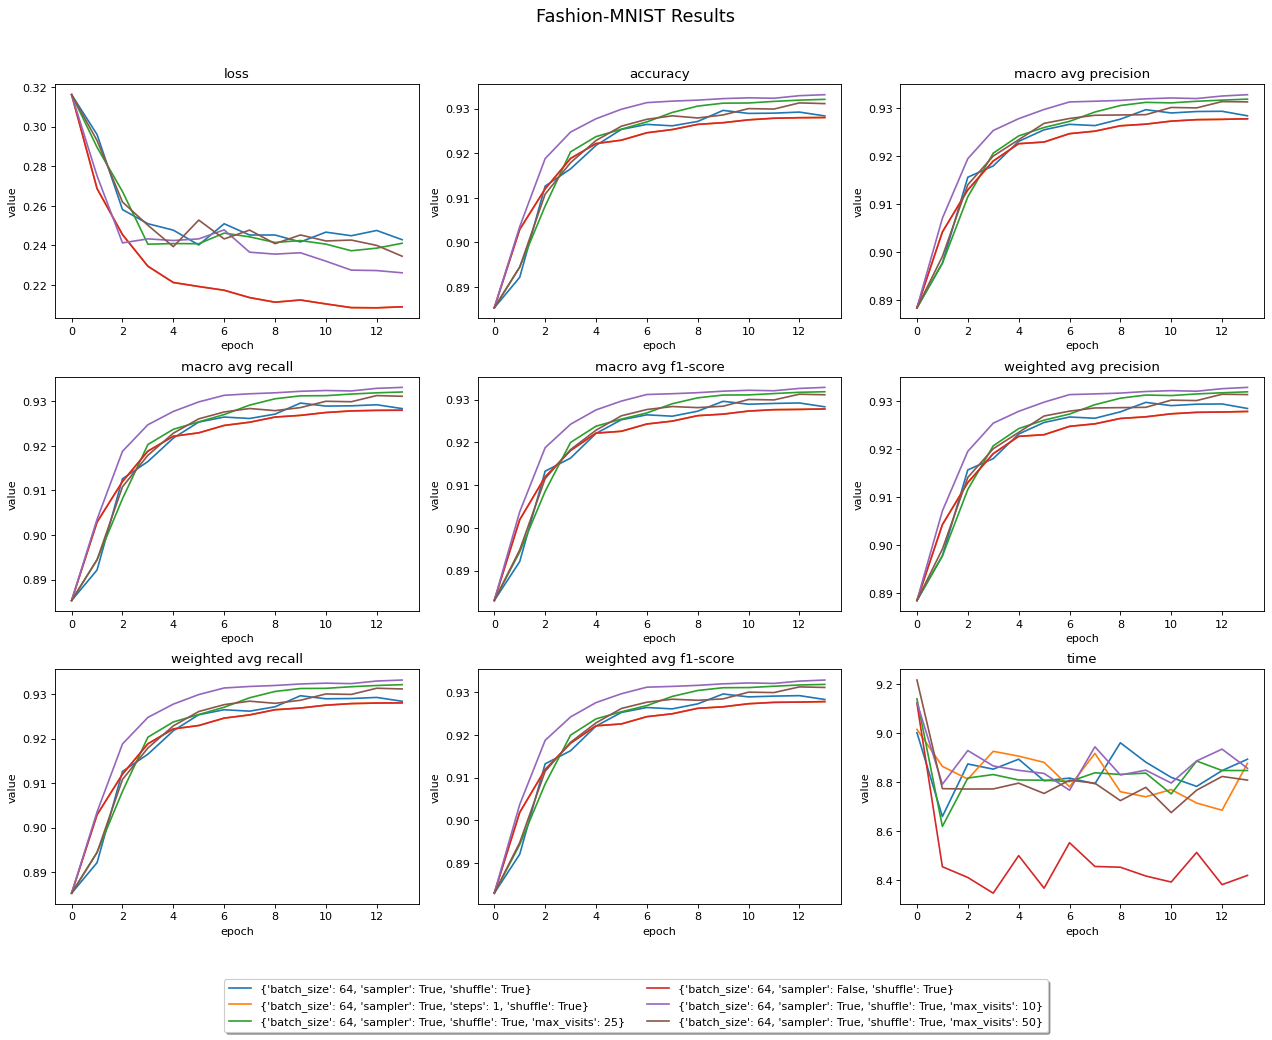

In [19]:
summary.plot_experiments_as_grid(params, results, metrics, title="Fashion-MNIST Results")

In [20]:
summary.show_experiments_at_epoch(params, results, metrics, 13)

,loss,accuracy,macro avg precision,macro avg recall,macro avg f1-score,weighted avg precision,weighted avg recall,weighted avg f1-score,time,batch_size,sampler,shuffle,steps,max_visits
0,0.242917,0.92836,0.928433,0.92836,0.928299,0.928433,0.92836,0.928299,8.894000,64,True,True,NaN,NaN
1,0.209003,0.92800,0.927813,0.92800,0.927798,0.927813,0.92800,0.927798,8.877312,64,True,True,1.0,NaN
2,0.241115,0.93208,0.931908,0.93208,0.931821,0.931908,0.93208,0.931821,8.847992,64,True,True,NaN,25.0
3,0.209003,0.92800,0.927813,0.92800,0.927798,0.927813,0.92800,0.927798,8.419454,64,False,True,NaN,NaN
4,0.226184,0.93312,0.932835,0.93312,0.932841,0.932835,0.93312,0.932841,8.857046,64,True,True,NaN,10.0
5,0.234572,0.93112,0.931331,0.93112,0.931109,0.931331,0.93112,0.931109,8.808803,64,True,True,NaN,50.0
